In [1]:
from KMeans import KMeans
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import datasets

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

In [2]:
iris = datasets.load_iris()
X, y = iris.data, iris.target

In [3]:
cls = KMeans(max_iterations=100, n_clusters=3)
cls.fit(X, plot = False)

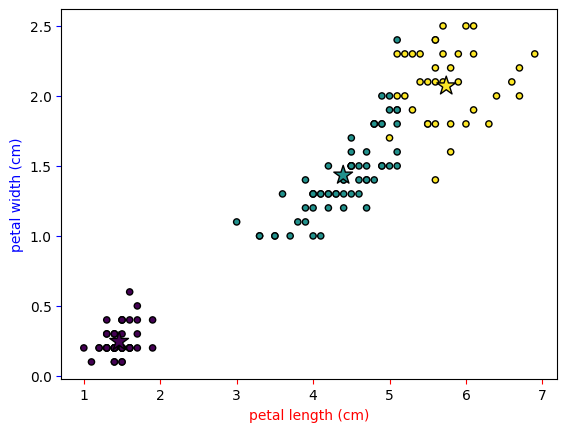

In [4]:
cmap = ListedColormap(["#FF0000", "#00FF00", "#0000FF"])
fig, ax = plt.subplots()
# plt.figure(facecolor="white", edgecolor="purple")

ax.set_xlabel(iris.feature_names[2], c = "red")
ax.set_ylabel(iris.feature_names[3], c = "blue")

ax.tick_params("x", color = "red")
ax.tick_params("y", color = "blue")

ax.scatter(X[:,2], X[:,3], c = cls.labels, edgecolors="black", s = 20)
ax.scatter(cls.centroids[:,2], cls.centroids[:,3], c = range(3), s = 200, edgecolors = "black", marker = "*")
plt.show()

In [5]:
df = pd.DataFrame(data = iris.data, columns = iris.feature_names)
df["target"] = pd.Series(iris.target)
df.head(3)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0


In [6]:
X[cls.labels == 1]
len(X[cls.labels == 1])

62